In [1]:
include("Chapter 15 Snippets.jl")
using Distributions
using Random
using Statistics
using Plots
using SymPy


(process:2712): GLib-GIO-WARNING **: 01:52:16.040: Unexpectedly, UWP app `30008NitroOfficeDVDApp.NebulaeBookReader_2.1.3.0_x86__k9060n443y9rm' (AUMId `30008NitroOfficeDVDApp.NebulaeBookReader_k9060n443y9rm!App') supports 15 extensions but has no verbs


# Run Sharpe Ratio Trials 
Targets a Sharpe ratio as a function of the number of bets

In [2]:
sharpeRatioTrials(0.5, 1000000)

(0.000534, 1.000000357422289, 0.0005339998091365659)

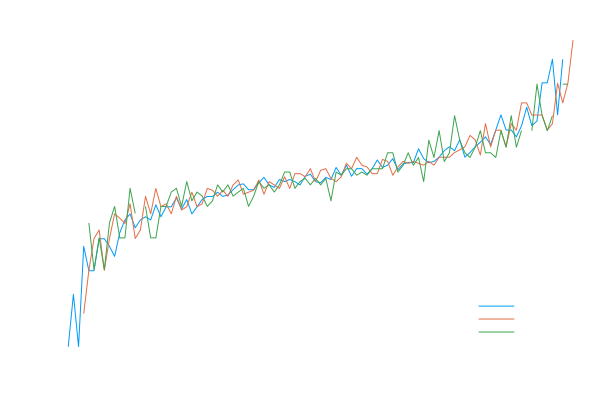

In [3]:
x1 = collect(0.01:0.01:0.99)
y1 = [sharpeRatioTrials(i, 75)[3] for i in 0.01:0.01:0.99]
y11 = [sharpeRatioTrials(i, 50)[3] for i in 0.01:0.01:0.99]
y111 = [sharpeRatioTrials(i, 25)[3] for i in 0.01:0.01:0.99]
plot(x1, y1, label = "n = 75", background=:transparent, legend=:bottomright)
plot!(x1, y11, label = "n = 50", background=:transparent)
plot!(x1, y111, label = "n = 25", title = "Precision as a function of Sharpe Ratio", xaxis = "Precision", yaxis = "Sharpe Ratio", background=:transparent)

# Symbolic Target Sharpe Ratio
Uses the SymPy library for symbolic operations 

In [4]:
targetSharpeRatioSymbolic()

           2        
-p*(-d + u) *(p - 1)

# Implied Precision
Computes implied precision 

In [5]:
p = 0.7
sl = -0.01
pt = 0.005
freq = 260
tSR = 1.17

impliedPrecision(sl, pt, freq, tSR)

0.6999204994514548

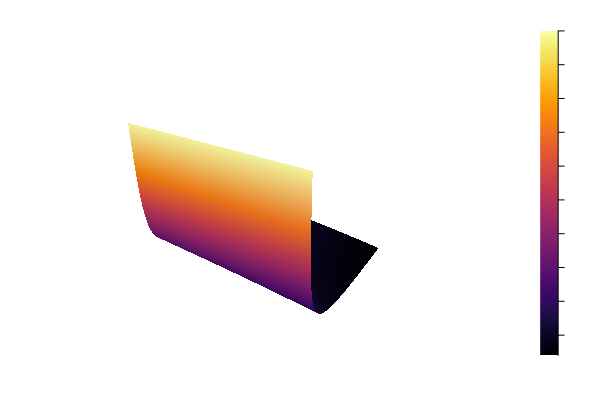

In [13]:
f_binHR(x, y) = impliedPrecision(x, 0.1, y, 1.5)
surface(-0.01:0.0001:-0.001, 0:100, f_binHR, 
        title = "Implied precision as a function of Frequency and Stop Loss", 
        xlabel = "Stop Loss", ylabel = "Frequency", background = :transparent)

# Implied Betting Frequency
Computes the number of bets/year needed to achieve a Sharpe ratio with a certain precision rate

In [7]:
precision = 0.7
stopLoss = -0.01
profitTaking = 0.005
freq = 260
targetSharpeRatio = 1.17

print(binFrequency(stopLoss, profitTaking, precision, targetSharpeRatio))

258.7221000000013

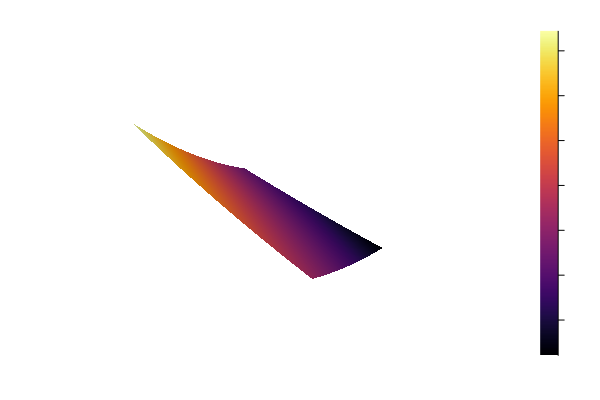

In [8]:
f_binFreq(x, y) = binFrequency(x, 0.1, y, 1.5)
surface(-0.01:0.0001:-0.001, 0.5:0.001:0.6, f_binFreq, 
        title = "The implied precision as a function of n and sl", 
        xlabel = "Stop Loss", ylabel = "Precision", background=:transparent)

# Strategy Risk
Calculates the strategy risk in practice

In [9]:
μ1 = 0.05
μ2 = -0.1
σ1 = 0.05
σ2 = 0.1
probability1 = 0.75
nObs = 2600
freq = 260
targetSharpeRatio = 2

calculateStrategyRisk(μ1, μ2, σ1, σ2, probability1, nObs, freq, targetSharpeRatio)

Prob strategy will fail 0.48334168873305944

0.48334168873305944